In [133]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
import os

%matplotlib inline

In [134]:
df = pd.read_csv("train.csv")

In [135]:
KAGGLE_TEST = pd.read_csv("test.csv")

In [136]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [137]:
KAGGLE_TEST.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [138]:
def processDateTime(dataframe):
    '''Break Date Time into multiple features: year, month, day, hr etc'''
    dataframe.index = pd.to_datetime(dataframe['datetime']) # creating an index from the timestamp
    dataframe['year']= dataframe.index.year # year
    dataframe['month'] = dataframe.index.month # month
    dataframe['hours'] = dataframe.index.hour # hours 
    dataframe['day'] = dataframe.index.dayofweek # day of week (Monday=0, Sunday=6)

In [139]:
processDateTime(df)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hours,day
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,2011,1,0,5
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,2011,1,1,5
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,2011,1,2,5
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,2011,1,3,5
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,2011,1,4,5


In [140]:
processDateTime(KAGGLE_TEST)
KAGGLE_TEST.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hours,day
datetime,,,,,,,,,,,,,
2011-01-20 00:00:00,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
2011-01-20 01:00:00,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2011-01-20 02:00:00,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
2011-01-20 03:00:00,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
2011-01-20 04:00:00,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


In [141]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hours,day
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,23.000000,6.000000


In [142]:
df['workingday'].unique()

array([0, 1])

In [143]:
df['weather'].unique()

array([1, 2, 3, 4])

In [144]:
df['workingday'].unique()

array([0, 1])

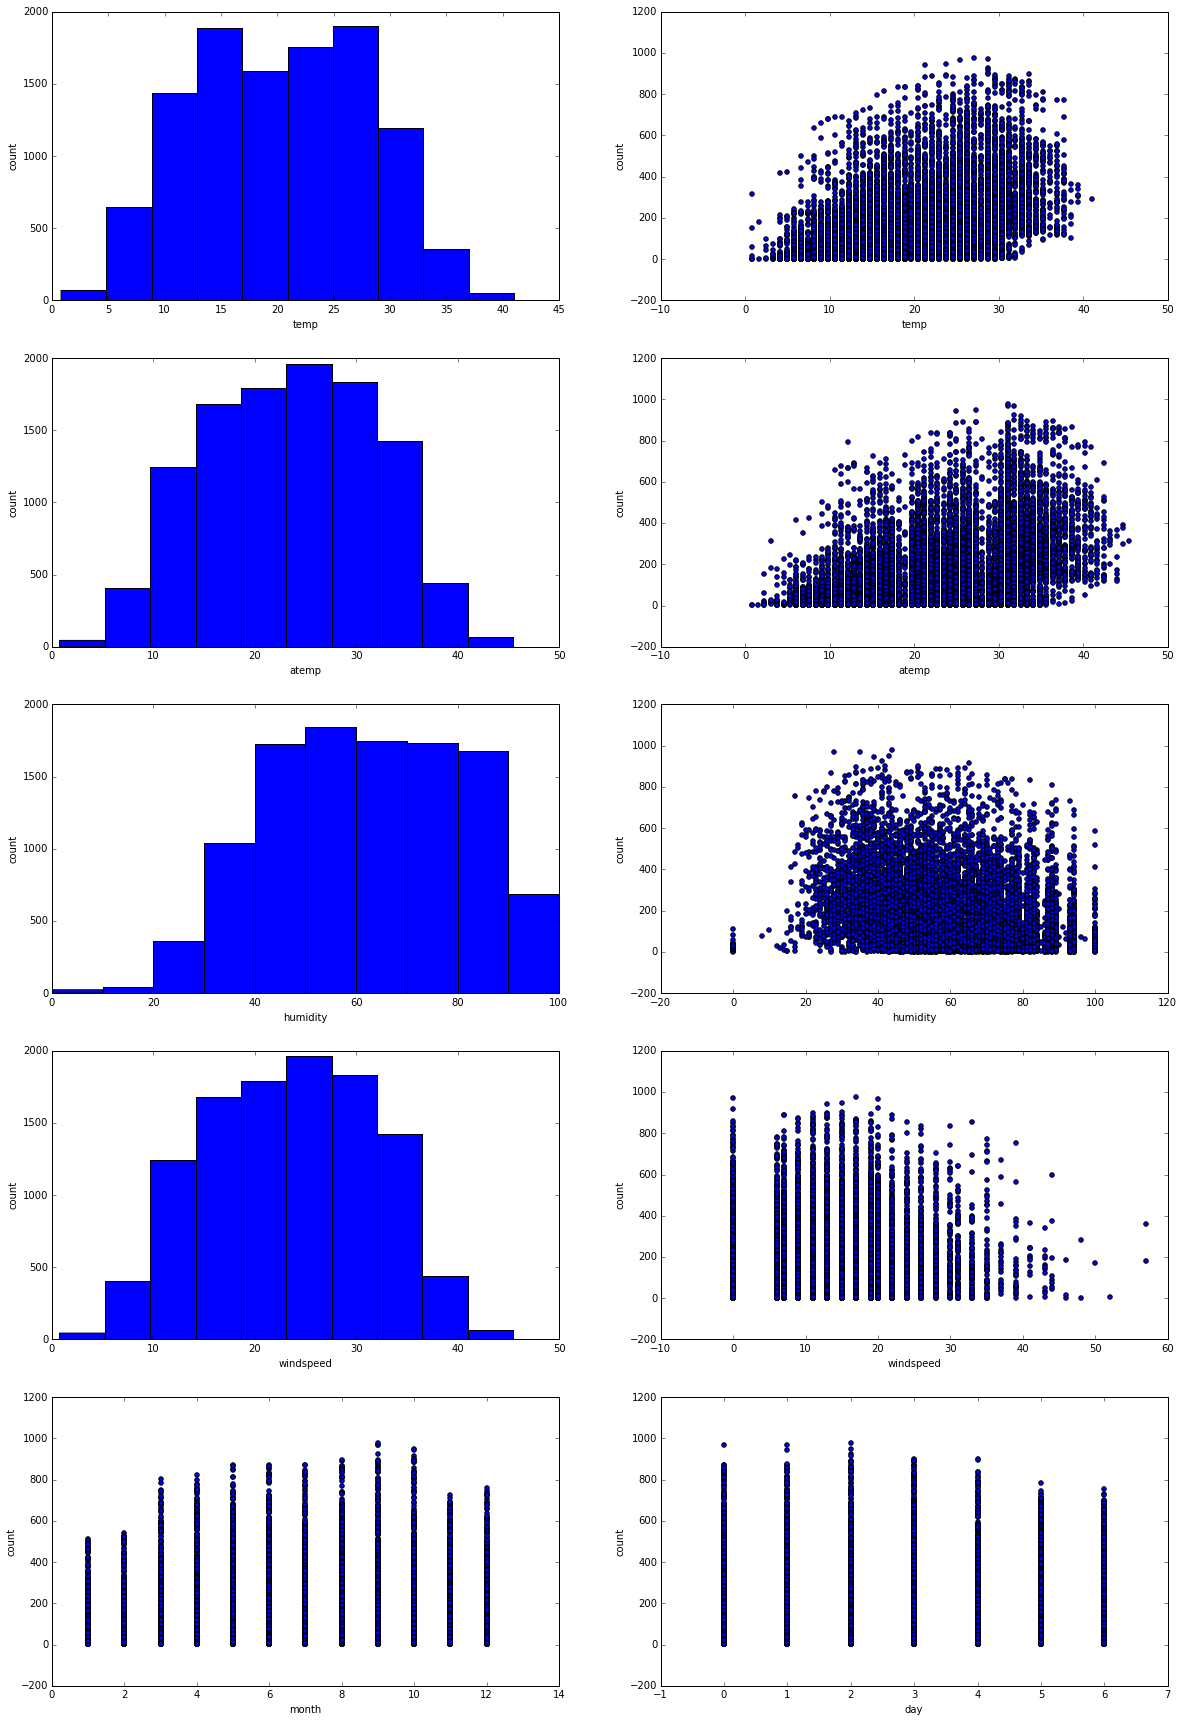

In [145]:
# Exploratory Data Analysis
fig = plt.figure(figsize=(20, 30), dpi=80)
ax1 = fig.add_subplot(521)
ax1.set_xlabel("temp")
ax1.set_ylabel("count")
ax1.hist(df.temp)
ax2 = fig.add_subplot(522)
ax2.set_xlabel("temp")
ax2.set_ylabel("count")
ax2.scatter(df['temp'], df['count'])

ax1 = fig.add_subplot(523)
ax1.set_xlabel("atemp")
ax1.set_ylabel("count")
ax1.hist(df.atemp)
ax2 = fig.add_subplot(524)
ax2.set_xlabel("atemp")
ax2.set_ylabel("count")
ax2.scatter(df['atemp'], df['count'])

ax1 = fig.add_subplot(525)
ax1.set_xlabel("humidity")
ax1.set_ylabel("count")
ax1.hist(df.humidity)
ax2 = fig.add_subplot(526)
ax2.set_xlabel("humidity")
ax2.set_ylabel("count")
ax2.scatter(df['humidity'], df['count'])

ax1 = fig.add_subplot(527)
ax1.set_xlabel("windspeed")
ax1.set_ylabel("count")
ax1.hist(df.atemp)
ax2 = fig.add_subplot(528)
ax2.set_xlabel("windspeed")
ax2.set_ylabel("count")
ax2.scatter(df['windspeed'], df['count'])

ax1 = fig.add_subplot(529)
ax1.set_xlabel("month")
ax1.set_ylabel("count")
ax1.scatter(df['month'], df['count'])

ax1 = fig.add_subplot(5,2,10)
ax1.set_xlabel("day")
ax1.set_ylabel("count")
ax1.scatter(df['day'], df['count'])


In [146]:
X = df[[1,2,3,4,5,6,7,8,12,13,14,15]].values
print "Shape of all features: ", X.shape
Y = df[[11]].values
print "Shape of labels: ", Y.shape
KAGGLE_TEST_DATA = KAGGLE_TEST[[1,2,3,4,5,6,7,8,9,10,11,12]].values
print "Shape of KAGGLE TEST SET: ", KAGGLE_TEST_DATA.shape

Shape of all features:  (10886, 12)
Shape of labels:  (10886, 1)
Shape of KAGGLE TEST SET:  (6493, 12)


In [147]:
test_data, test_labels = X[9000:], Y[9000:]
dev_data, dev_labels = X[7000:9000], Y[7000:9000]
train_data, train_labels = X[:7000], Y[:7000]
print 'train data shape: ', train_data.shape
print 'train label shape:', train_labels.shape
print 'dev data shape: ', dev_data.shape
print 'dev label shape:', dev_labels.shape
print 'test data shape: ', test_data.shape
print 'test labels shape:', test_labels.shape

train data shape:  (7000, 12)
train label shape: (7000, 1)
dev data shape:  (2000, 12)
dev label shape: (2000, 1)
test data shape:  (1886, 12)
test labels shape: (1886, 1)


In [148]:
# Commenting out Feature Scaling at this point
#scaler = preprocessing.StandardScaler().fit(train_data)
#test_data_scaled = scaler.transform(test_data)
#dev_data_scaled = scaler.transform(dev_data) 
#train_data_scaled = scaler.transform(train_data) 

In [149]:
def output_model_summary(estimator, dev, test):
    '''Prints Model Summary'''
    # The coefficients
    if 'coef_' in dir(estimator):
        print('Coefficients: \n', estimator.coef_)
    print('Intercept: \n', estimator.intercept_)
    # The mean square error
    print("Residual sum of squares: %.2f"
          % np.mean((np.rint(estimator.predict(dev)) - dev_labels) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('[DEV] R^2 - Variance score: %.2f' % estimator.score(dev, dev_labels))
    print('[TEST] R^2 - Variance score: %.2f' % estimator.score(test, test_labels))

In [150]:
# Ordinary Least Squares (Baseline)
# Create linear regression object
ols = linear_model.LinearRegression()

# Train the model using the training sets
ols.fit(train_data, train_labels)

# Model Summary
output_model_summary(ols, dev_data, test_data)

('Coefficients: \n', array([[  0.9289234 ,  -5.55494442,  -0.80962273,  -7.5765882 ,
         -1.72148756,   7.53512822,  -1.36473899,   0.46703364,
         78.86722098,   6.16747751,   6.10945462,   0.77044882]]))
('Intercept: \n', array([-158621.92481036]))
Residual sum of squares: 35048.61
[DEV] R^2 - Variance score: 0.28
[TEST] R^2 - Variance score: 0.26


In [151]:
# Kaggle Baseline
def generate_kaggle_submission(pred, f_name):
    print "Shape of Kaggle Test Set: ", KAGGLE_TEST_DATA.shape
    print "Shape of Kaggle Test Set Prediction: ", pred.shape
    pred = np.rint(pred)
    pred = np.where(pred < 0, 0, pred)
    df_pred = pd.DataFrame(pred, columns=['count'])
    
    df_dt = pd.DataFrame(KAGGLE_TEST['datetime'])
    df_dt.reset_index(drop=True, inplace=True)
    
    print df_dt.head()
    print df_pred.head()
    
    output = pd.concat([df_dt, df_pred], axis=1)
    print "Shape of Submission Dataframe: ", output.shape
    print output.head()
    
    file = [os.getcwd(),'/submissions/',f_name]
    output.to_csv("".join(file), index=False)

In [158]:
# Generate Kaggle Baseline
# Train the model using the entire data set
ols.fit(X, Y)
pred = ols.predict(KAGGLE_TEST_DATA)
generate_kaggle_submission(pred, "baseline.csv")

Shape of Kaggle Test Set:  (6493, 12)
Shape of Kaggle Test Set Prediction:  (6493, 1)
              datetime
0  2011-01-20 00:00:00
1  2011-01-20 01:00:00
2  2011-01-20 02:00:00
3  2011-01-20 03:00:00
4  2011-01-20 04:00:00
   count
0      0
1      0
2      0
3      0
4      0
Shape of Submission Dataframe:  (6493, 2)
              datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0


In [153]:
# Ridge Regression
clf = linear_model.RidgeCV(alphas=[0.1, 0.2, 0.5, 1.0, 10.0, 20.0, 50.0, 100.0])

# Train the model using the training sets
clf.fit(train_data, train_labels)

# Model Summary
output_model_summary(clf, dev_data, test_data)

('Coefficients: \n', array([[  0.80963834,  -4.7679834 ,  -0.61459773,  -7.51203086,
         -1.75204883,   7.55442604,  -1.36887228,   0.46501526,
         77.12381814,   6.11272879,   6.10759509,   0.81565522]]))
('Intercept: \n', array([-155114.91574119]))
Residual sum of squares: 35048.25
[DEV] R^2 - Variance score: 0.28
[TEST] R^2 - Variance score: 0.26


In [154]:
svr = svm.SVR(kernel='linear')

# Train the model using the training sets
svr.fit(train_data, np.squeeze(train_labels))

# Model Summary

output_model_summary(svr, dev_data, test_data)

# Kaggle Submission with SVR Linear
pred = svr.predict(KAGGLE_TEST_DATA)
generate_kaggle_submission(pred, "submission_svr_linear.csv")

('Coefficients: \n', array([[ -0.32196812,   0.21684341,   8.62544535,   2.20376443,
         -0.21562669,  -4.37862713,   1.40095023,  -0.29353756,
        -41.8152456 ,  -3.9883043 ,  -5.88886682,  -1.72667925]]))
('Intercept: \n', array([-84082.38381477]))
Residual sum of squares: 58989.04
[DEV] R^2 - Variance score: 0.16
[TEST] R^2 - Variance score: 0.10
Shape of Kaggle Test Set:  (6493, 12)
Shape of Kaggle Test Set Prediction:  (6493,)
              datetime
0  2011-01-20 00:00:00
1  2011-01-20 01:00:00
2  2011-01-20 02:00:00
3  2011-01-20 03:00:00
4  2011-01-20 04:00:00
   count
0      0
1      0
2      2
3      8
4     14
Shape of Submission Dataframe:  (6493, 2)
              datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      2
3  2011-01-20 03:00:00      8
4  2011-01-20 04:00:00     14


In [159]:
# Polynomial Features
poly = preprocessing.PolynomialFeatures(2)
test_data_poly = poly.fit_transform(test_data)
dev_data_poly = poly.transform(dev_data) 
train_data_poly = poly.transform(train_data) 
print 'train data shape: ', train_data_poly.shape
print 'dev data shape: ', dev_data_poly.shape
print 'test data shape: ', test_data_poly.shape


# Train the model using the training sets
clf.fit(train_data_poly, train_labels)

# Model Summary
output_model_summary(clf, dev_data_poly, test_data_poly)

# Kaggle Submission with Poly Ridge
kaggle_test_poly = poly.transform(KAGGLE_TEST_DATA) 
print 'Kaggle Test Poly Shape: ', kaggle_test_poly.shape
pred = clf.predict(kaggle_test_poly)
generate_kaggle_submission(pred, "submission_poly_ridge.csv")

train data shape:  (7000, 91)
dev data shape:  (2000, 91)
test data shape:  (1886, 91)
('Coefficients: \n', array([[  0.00000000e+00,  -1.13352717e+01,   1.33475499e+00,
         -2.50247864e+00,   2.40565017e+01,  -6.50955916e+02,
         -7.31064402e+02,   8.34103037e+02,  -2.58619865e+02,
          5.27562224e-06,  -5.65548888e+01,  -5.43020752e+02,
          1.94457864e+01,  -1.03550181e+01,   1.82057910e+02,
          2.82044023e+01,   3.41578583e+00,  -1.06279754e+01,
          7.23893077e+00,  -9.30895505e-01,  -8.11706532e-01,
          4.18820828e-02,   8.97324752e+00,  -2.99387024e-01,
          4.18258419e+00,   1.33475499e+00,   0.00000000e+00,
          4.49541549e+01,   4.97861817e+00,  -3.18122904e+00,
         -1.18057129e-01,   5.89233384e-01,  -1.31124308e-01,
         -5.59740806e+01,  -7.94700150e-01,   1.31702467e+01,
         -2.50247864e+00,  -1.16611579e+01,  -1.94422339e+00,
         -1.64878288e+00,   1.32045528e+00,   5.74283146e-01,
         -4.48243544e-02